# Import Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Food_Delivery_Time_Prediction.csv')

In [3]:
df.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,Rainy,Medium,4,Medium,Afternoon,Car,4.1,3.0,26.22,1321.10,81.54
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,Cloudy,Medium,8,Low,Night,Car,4.5,4.2,62.61,152.21,29.02
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,Snowy,Medium,9,High,Night,Bike,3.3,3.4,48.43,1644.38,64.17
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,Cloudy,Low,2,Medium,Evening,Bike,3.2,3.7,111.63,541.25,79.23
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,Rainy,High,6,Low,Night,Bike,3.5,2.8,32.38,619.81,2.34


# Inspect Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Order_ID                    200 non-null    object 
 1   Customer_Location           200 non-null    object 
 2   Restaurant_Location         200 non-null    object 
 3   Distance                    200 non-null    float64
 4   Weather_Conditions          200 non-null    object 
 5   Traffic_Conditions          200 non-null    object 
 6   Delivery_Person_Experience  200 non-null    int64  
 7   Order_Priority              200 non-null    object 
 8   Order_Time                  200 non-null    object 
 9   Vehicle_Type                200 non-null    object 
 10  Restaurant_Rating           200 non-null    float64
 11  Customer_Rating             200 non-null    float64
 12  Delivery_Time               200 non-null    float64
 13  Order_Cost                  200 non

In [5]:
df.describe()

,Distance,Delivery_Person_Experience,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,11.498050,5.250000,3.738500,3.686500,70.494950,1046.488700,46.616650
std,6.841755,2.745027,0.703021,0.697063,29.830694,548.568922,29.361706
min,0.520000,1.000000,2.500000,2.600000,15.230000,122.300000,1.240000
25%,6.090000,3.000000,3.200000,3.100000,46.997500,553.270000,21.602500
50%,10.265000,5.000000,3.800000,3.700000,72.775000,1035.950000,47.530000
75%,16.497500,8.000000,4.300000,4.300000,96.650000,1543.125000,70.245000
max,24.900000,10.000000,5.000000,5.000000,119.670000,1997.420000,99.740000


In [6]:
df.shape

(200, 15)

# Handling Missing Values and Data Cleaning

In [7]:
df.isnull().sum()

Order_ID                      0
Customer_Location             0
Restaurant_Location           0
Distance                      0
Weather_Conditions            0
Traffic_Conditions            0
Delivery_Person_Experience    0
Order_Priority                0
Order_Time                    0
Vehicle_Type                  0
Restaurant_Rating             0
Customer_Rating               0
Delivery_Time                 0
Order_Cost                    0
Tip_Amount                    0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.value_counts()

Order_ID  Customer_Location       Restaurant_Location     Distance  Weather_Conditions  Traffic_Conditions  Delivery_Person_Experience  Order_Priority  Order_Time  Vehicle_Type  Restaurant_Rating  Customer_Rating  Delivery_Time  Order_Cost  Tip_Amount
ORD0001   (17.030479, 79.743077)  (12.358515, 85.100083)  1.57      Rainy               Medium              4                           Medium          Afternoon   Car           4.1                3.0              26.22          1321.10     81.54         1
ORD0138   (20.664072, 79.015535)  (16.511111, 85.649124)  9.64      Sunny               High                3                           Low             Afternoon   Bicycle       2.6                3.7              109.15         1728.54     55.88         1
ORD0128   (12.776104, 77.018445)  (18.657911, 78.408433)  7.94      Sunny               Medium              8                           Low             Evening     Car           2.8                3.9              34.51          1645.

In [10]:
df['Traffic_Conditions'].value_counts()

Traffic_Conditions
Low       81
Medium    68
High      51
Name: count, dtype: int64

# Data Transformation using ColumnTransformer

In [11]:
categorical_cols = df.select_dtypes(include='object').columns
print(categorical_cols)

Index(['Order_ID', 'Customer_Location', 'Restaurant_Location',
       'Weather_Conditions', 'Traffic_Conditions', 'Order_Priority',
       'Order_Time', 'Vehicle_Type'],
      dtype='object')


In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

transformer = ColumnTransformer(transformers=[
    ('tnf1', OrdinalEncoder(categories=[['Low', 'Medium', 'High'], ['Low', 'Medium', 'High']]), ['Traffic_Conditions', 'Order_Priority']),
    ('tnf2', OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first'), ['Weather_Conditions', 'Order_Time', 'Vehicle_Type'])
], remainder='passthrough') # Drop other columns like Order_ID, Customer_Location, Restaurant_Location

# Normalize/Standardize Numerical Features

In [13]:
features_to_scale = [
    'Restaurant_Rating',
    'Customer_Rating',
    'Order_Cost',
    'Tip_Amount',
    'Delivery_Person_Experience',
    'Distance'
]


In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

In [15]:
df

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",-1.454738,Rainy,Medium,-0.456512,Medium,Afternoon,Car,0.515500,-0.987317,26.22,0.501852,1.192403
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",1.439192,Cloudy,Medium,1.004325,Low,Night,Car,1.085900,0.738511,62.61,-1.634294,-0.600810
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",-0.666417,Snowy,Medium,1.369535,High,Night,Bike,-0.625302,-0.412041,48.43,1.092646,0.599332
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",0.335835,Cloudy,Low,-1.186930,Medium,Evening,Bike,-0.767902,0.019416,111.63,-0.923323,1.113532
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",-0.700119,Rainy,High,0.273907,Low,Night,Bike,-0.340101,-1.274955,32.38,-0.779755,-1.511757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,ORD0196,"(17.910045, 81.56199)","(18.098924, 87.896124)",1.805512,Cloudy,High,1.004325,Medium,Night,Bike,1.371100,0.450873,50.39,0.704997,0.673423
196,ORD0197,"(21.66459, 82.226635)","(16.892341, 80.554716)",-0.792431,Snowy,Medium,1.004325,Low,Night,Bicycle,-1.053102,-0.124403,90.54,1.231298,-0.216696
197,ORD0198,"(14.575401, 82.55641)","(13.625369, 82.418092)",1.335157,Snowy,High,-0.456512,Medium,Afternoon,Bike,-1.195702,-0.412041,73.20,0.566692,-1.417521
198,ORD0199,"(12.094497, 82.893369)","(19.135509, 86.659978)",1.840679,Rainy,High,1.369535,Low,Night,Car,0.230299,1.601424,53.94,-1.264810,1.319075


In [16]:
df.drop('Order_ID',axis=1, inplace=True)

In [17]:
df

,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,"(17.030479, 79.743077)","(12.358515, 85.100083)",-1.454738,Rainy,Medium,-0.456512,Medium,Afternoon,Car,0.515500,-0.987317,26.22,0.501852,1.192403
1,"(15.398319, 86.639122)","(14.174874, 77.025606)",1.439192,Cloudy,Medium,1.004325,Low,Night,Car,1.085900,0.738511,62.61,-1.634294,-0.600810
2,"(15.687342, 83.888808)","(19.594748, 82.048482)",-0.666417,Snowy,Medium,1.369535,High,Night,Bike,-0.625302,-0.412041,48.43,1.092646,0.599332
3,"(20.415599, 78.046984)","(16.915906, 78.278698)",0.335835,Cloudy,Low,-1.186930,Medium,Evening,Bike,-0.767902,0.019416,111.63,-0.923323,1.113532
4,"(14.786904, 78.706532)","(15.206038, 86.203182)",-0.700119,Rainy,High,0.273907,Low,Night,Bike,-0.340101,-1.274955,32.38,-0.779755,-1.511757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,"(17.910045, 81.56199)","(18.098924, 87.896124)",1.805512,Cloudy,High,1.004325,Medium,Night,Bike,1.371100,0.450873,50.39,0.704997,0.673423
196,"(21.66459, 82.226635)","(16.892341, 80.554716)",-0.792431,Snowy,Medium,1.004325,Low,Night,Bicycle,-1.053102,-0.124403,90.54,1.231298,-0.216696
197,"(14.575401, 82.55641)","(13.625369, 82.418092)",1.335157,Snowy,High,-0.456512,Medium,Afternoon,Bike,-1.195702,-0.412041,73.20,0.566692,-1.417521
198,"(12.094497, 82.893369)","(19.135509, 86.659978)",1.840679,Rainy,High,1.369535,Low,Night,Car,0.230299,1.601424,53.94,-1.264810,1.319075


# Feature Engineering(Haversine Formula for Distance Calculation)

In [18]:
 !pip install haversine

Defaulting to user installation because normal site-packages is not writeable


In [19]:
from haversine import haversine, Unit
import re

def extract_lat_long(location_str):
    # Use regex to find numbers (latitude and longitude) in the string
    match = re.findall(r'-?\d+\.?\d*', location_str)
    if match and len(match) == 2:
        return float(match[0]), float(match[1])
    return None, None

# Extract latitude and longitude into new temporary columns
df['Rest_Lat'], df['Rest_Long'] = zip(*df['Restaurant_Location'].apply(extract_lat_long))
df['Cust_Lat'], df['Cust_Long'] = zip(*df['Customer_Location'].apply(extract_lat_long))


# Calculate distance using haversine
df['Distance'] = df.apply(lambda row: haversine((row['Rest_Lat'], row['Rest_Long']),
                                                 (row['Cust_Lat'], row['Cust_Long'])), axis=1)

# Drop the temporary latitude and longitude columns and the original location strings
df = df.drop(columns=['Rest_Lat', 'Rest_Long', 'Cust_Lat', 'Cust_Long', 'Customer_Location', 'Restaurant_Location'])

display(df.head())

,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,775.652269,Rainy,Medium,-0.456512,Medium,Afternoon,Car,0.515500,-0.987317,26.22,0.501852,1.192403
1,1042.387037,Cloudy,Medium,1.004325,Low,Night,Car,1.085900,0.738511,62.61,-1.634294,-0.600810
2,476.221364,Snowy,Medium,1.369535,High,Night,Bike,-0.625302,-0.412041,48.43,1.092646,0.599332
3,389.913167,Cloudy,Low,-1.186930,Medium,Evening,Bike,-0.767902,0.019416,111.63,-0.923323,1.113532
4,806.507000,Rainy,High,0.273907,Low,Night,Bike,-0.340101,-1.274955,32.38,-0.779755,-1.511757


# Exploratory Data Analysis(EDA)

In [20]:
df.describe()

,Distance,Delivery_Person_Experience,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
count,200.000000,2.000000e+02,2.000000e+02,2.000000e+02,200.000000,2.000000e+02,2.000000e+02
mean,603.038748,4.440892e-18,3.463896e-16,4.529710e-16,70.494950,-2.042810e-16,-4.440892e-18
std,269.797169,1.002509e+00,1.002509e+00,1.002509e+00,29.830694,1.002509e+00,1.002509e+00
min,29.871968,-1.552139e+00,-1.766103e+00,-1.562593e+00,15.230000,-1.688954e+00,-1.549315e+00
25%,389.197830,-8.217208e-01,-7.679018e-01,-8.434984e-01,46.997500,-9.013569e-01,-8.540689e-01
50%,558.789693,-9.130231e-02,8.769909e-02,1.941556e-02,72.775000,-1.925947e-02,3.118490e-02
75%,807.603557,1.004325e+00,8.006998e-01,8.823295e-01,96.650000,9.076026e-01,8.067529e-01
max,1299.246062,1.734744e+00,1.798901e+00,1.889062e+00,119.670000,1.737826e+00,1.813813e+00


# Correlation Analysis and heatmap

In [21]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Display correlation with respect to Delivery_Time
print("Correlation with Delivery_Time:\n")
print(correlation_matrix['Delivery_Time'].sort_values(ascending=False))

Correlation with Delivery_Time:

Delivery_Time                 1.000000
Order_Cost                   -0.009307
Delivery_Person_Experience   -0.019098
Customer_Rating              -0.021952
Tip_Amount                   -0.029154
Restaurant_Rating            -0.091855
Distance                     -0.170822
Name: Delivery_Time, dtype: float64


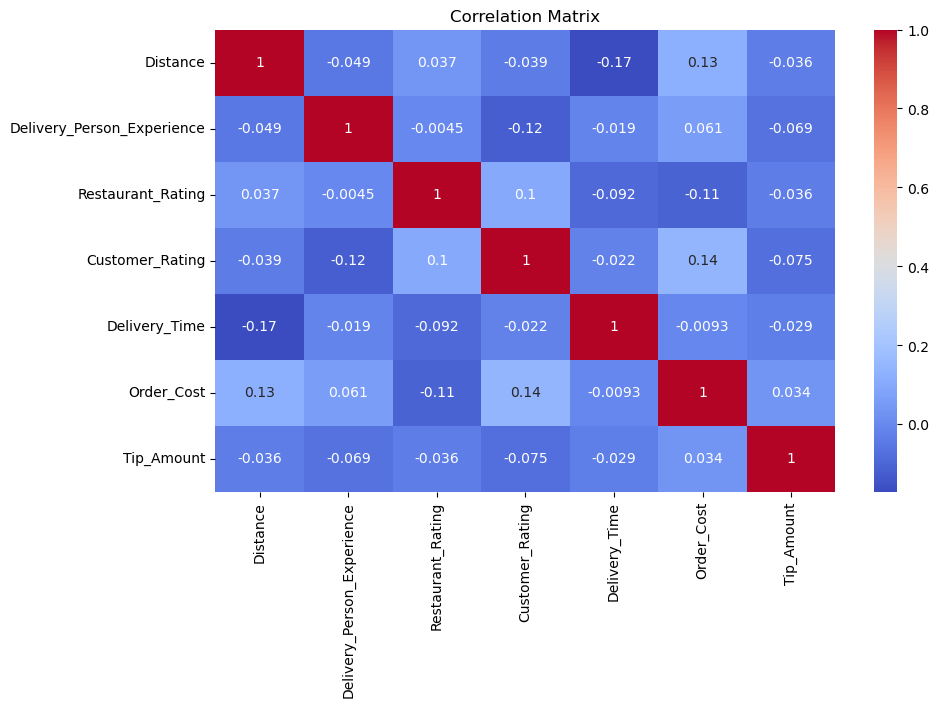

In [22]:
# Visualize correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Boxplot

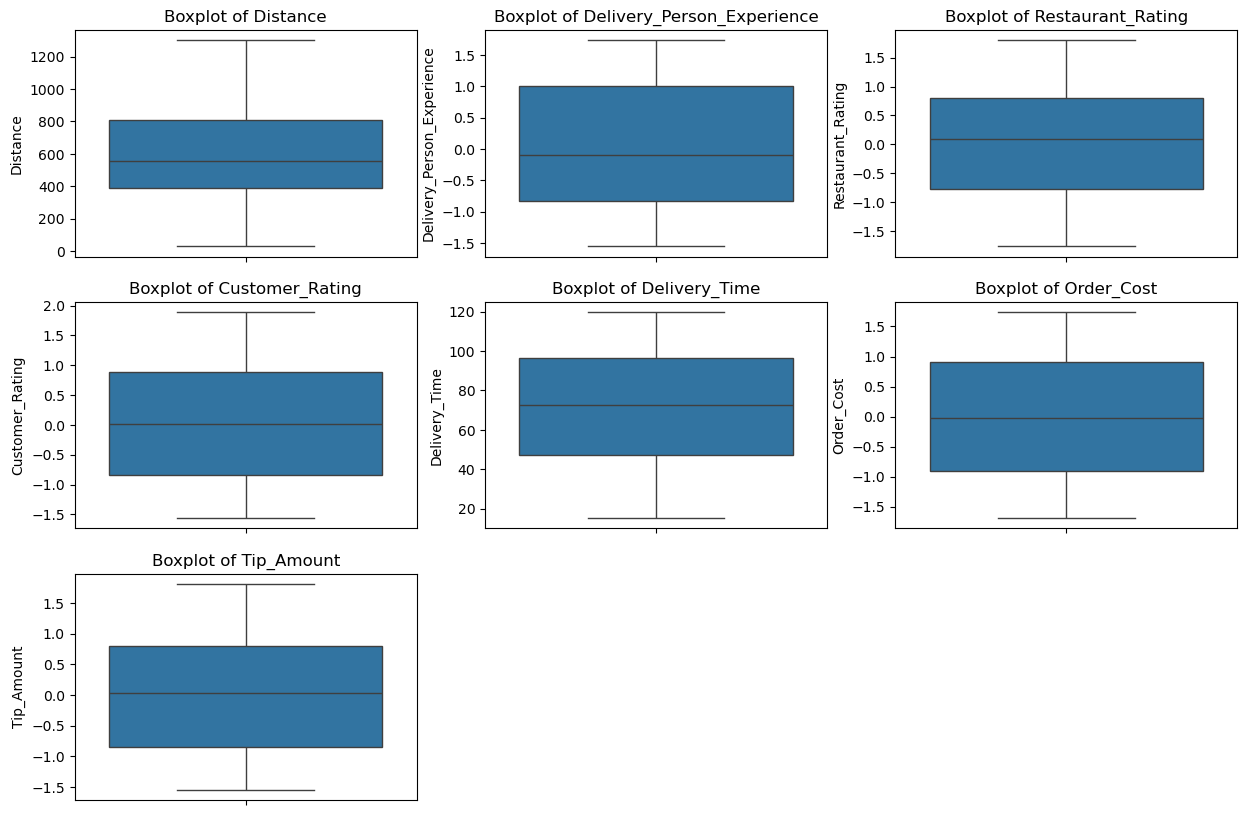

In [23]:
# Set up the plot layout
plt.figure(figsize=(15, 10))

# Plot each feature's boxplot in a subplot
for i, col in enumerate(numeric_df):
    plt.subplot(3, 3, i+1)  # 3 rows, 3 columns grid
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot of {col}')
plt.show()

# Mean, Median, Mode and Variance Calculation

In [24]:
numerical_col=df.drop(['Order_Priority','Weather_Conditions','Traffic_Conditions','Order_Time','Vehicle_Type'],axis=1)

In [25]:
print("Mean:")
for col in numerical_col:
    print(f"{col}: {df[col].mean():.2f}")

Mean:
Distance: 603.04
Delivery_Person_Experience: 0.00
Restaurant_Rating: 0.00
Customer_Rating: 0.00
Delivery_Time: 70.49
Order_Cost: -0.00
Tip_Amount: -0.00


In [26]:
print("\nMedian:")
for col in numerical_col:
    print(f"{col}: {df[col].median():.2f}")


Median:
Distance: 558.79
Delivery_Person_Experience: -0.09
Restaurant_Rating: 0.09
Customer_Rating: 0.02
Delivery_Time: 72.78
Order_Cost: -0.02
Tip_Amount: 0.03


In [27]:
print("\nMode:")
for col in numerical_col:
     mode_val = df[col].mode()
     print(f"{col}: {mode_val.values[0] if not mode_val.empty else 'No Mode'}")


Mode:
Distance: 29.871968263595548
Delivery_Person_Experience: 1.0043254236146966
Restaurant_Rating: 0.08769909132992527
Customer_Rating: -1.5625933649946497
Delivery_Time: 66.84
Order_Cost: 1.401255869563944
Tip_Amount: -1.5158539777825168


In [28]:
print("\nVariance:")
for col in numerical_col:
    print(f"{col}: {df[col].var():.2f}")


Variance:
Distance: 72790.51
Delivery_Person_Experience: 1.01
Restaurant_Rating: 1.01
Customer_Rating: 1.01
Delivery_Time: 889.87
Order_Cost: 1.01
Tip_Amount: 1.01


# LinerRegression(train test split)

In [29]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop('Delivery_Time', axis=1)
y = df['Delivery_Time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model(LinearRegression)

In [30]:
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

In [31]:
X_test_transformed.shape

(40, 16)

In [50]:
y_test = y_test.squeeze()  # Convert to Series

In [51]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_transformed,y_train)

LinearRegression()

# Evalute Model

In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = lr.predict(X_test_transformed)

In [53]:
print("MSE:",mean_squared_error(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))
print("R2:",r2_score(y_test,y_pred))

MSE: 0.06927801759786023
MAE: 0.22892333742919502
R2: 0.6954812413280869


# Logistic Regression Model

In [54]:
# Define the threshold for late delivery (e.g., in minutes)
threshold = 60  
df['Delivery_Status'] = df['Delivery_Time'].apply(lambda x: 1 if x > threshold else 0)

In [55]:
# delivery status[late] = 1
df

,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount,Delivery_Status
0,775.652269,Rainy,Medium,-0.456512,Medium,Afternoon,Car,0.515500,-0.987317,26.22,0.501852,1.192403,0
1,1042.387037,Cloudy,Medium,1.004325,Low,Night,Car,1.085900,0.738511,62.61,-1.634294,-0.600810,1
2,476.221364,Snowy,Medium,1.369535,High,Night,Bike,-0.625302,-0.412041,48.43,1.092646,0.599332,0
3,389.913167,Cloudy,Low,-1.186930,Medium,Evening,Bike,-0.767902,0.019416,111.63,-0.923323,1.113532,1
4,806.507000,Rainy,High,0.273907,Low,Night,Bike,-0.340101,-1.274955,32.38,-0.779755,-1.511757,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,670.131578,Cloudy,High,1.004325,Medium,Night,Bike,1.371100,0.450873,50.39,0.704997,0.673423,0
196,558.891974,Snowy,Medium,1.004325,Low,Night,Bicycle,-1.053102,-0.124403,90.54,1.231298,-0.216696,1
197,106.686837,Snowy,High,-0.456512,Medium,Afternoon,Bike,-1.195702,-0.412041,73.20,0.566692,-1.417521,1
198,880.581309,Rainy,High,1.369535,Low,Night,Car,0.230299,1.601424,53.94,-1.264810,1.319075,0


# Logistic Regression(train test split)

In [56]:
X = df.drop(columns=['Delivery_Status'])
y = df['Delivery_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression model train

In [57]:
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

In [58]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train_transformed, y_train)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Evaluate Model

In [59]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred = log_reg.predict(X_test_transformed)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

[[13  1]
 [ 0 26]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.96      1.00      0.98        26

    accuracy                           0.97        40
   macro avg       0.98      0.96      0.97        40
weighted avg       0.98      0.97      0.97        40

Accuracy: 0.975


# Model Performance (Histogram)

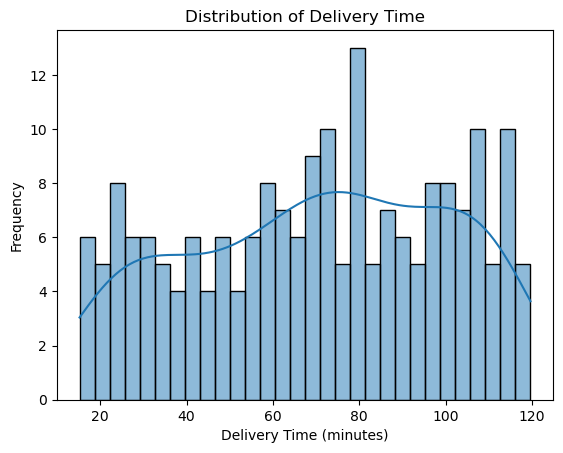

In [60]:
sns.histplot(df['Delivery_Time'], bins=30, kde=True)
plt.title('Distribution of Delivery Time')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Frequency')
plt.show()


# Scatter plot

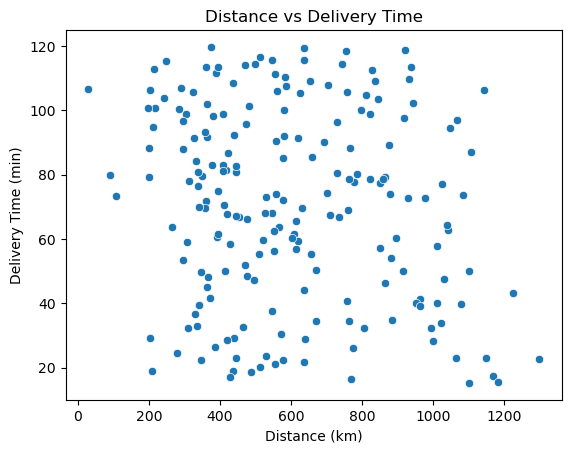

In [61]:
sns.scatterplot(x='Distance', y='Delivery_Time', data=df)
plt.title('Distance vs Delivery Time')
plt.xlabel('Distance (km)')
plt.ylabel('Delivery Time (min)')
plt.show()


# Boxplot

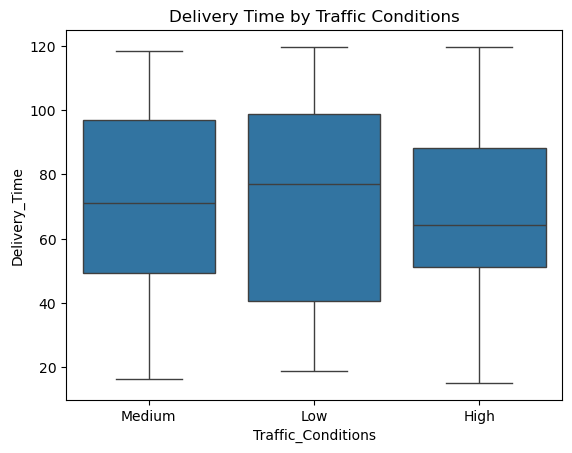

In [62]:
sns.boxplot(x='Traffic_Conditions', y='Delivery_Time', data=df)
plt.title('Delivery Time by Traffic Conditions')
plt.show()


# Heatmap (Correlation Matrix)

In [63]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])


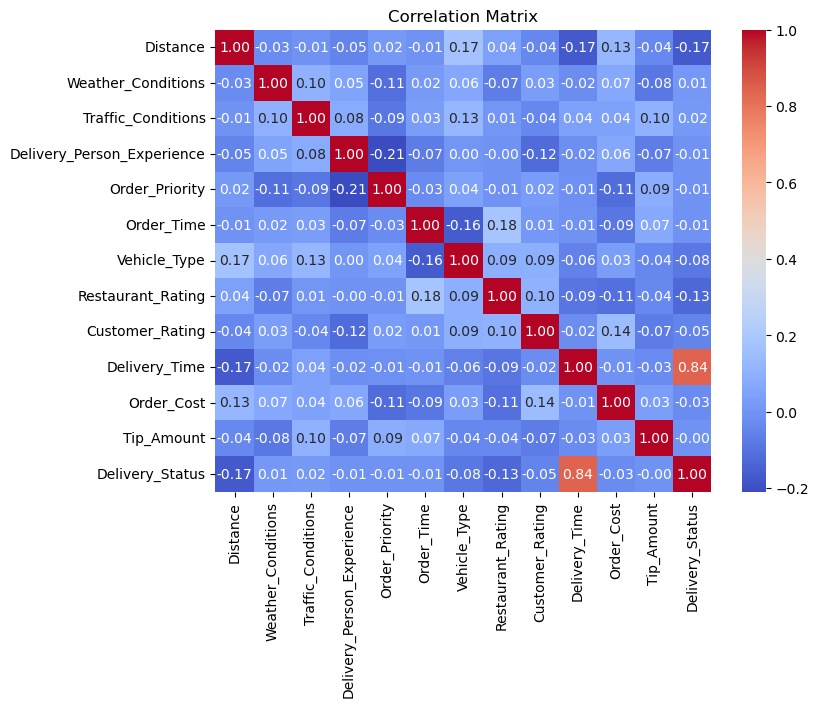

In [64]:
corr = df_encoded.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


# Residual Plot for Linear Regression

In [65]:
y_test = y_test.squeeze()  # Convert to Series


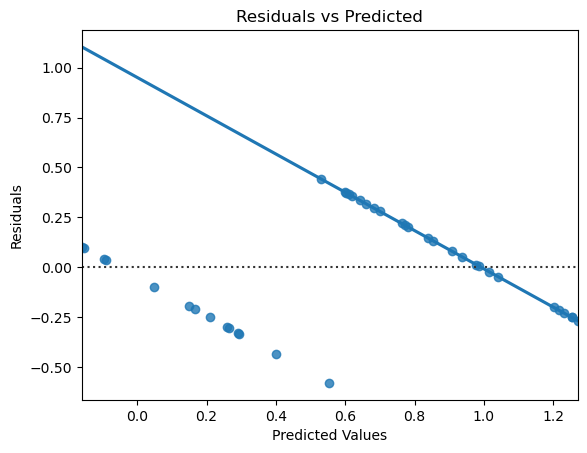

In [66]:
# Assuming model is already trained
y_pred = lr.predict(X_test_transformed)

sns.residplot(x=y_pred, y=y_test - y_pred, lowess=True)
plt.title("Residuals vs Predicted")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()


# Confusion Matrix(for Logistic Regression)

In [67]:
#from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_probs = log_reg.predict_proba(X_test_transformed)[:,1]

# Convert to binary predictions
y_pred = (y_probs >= 0.5).astype(int)

y_pred = log_reg.predict(X_test_transformed)
y_pred = (y_pred >= 0.5).astype(int)  # Force binary output




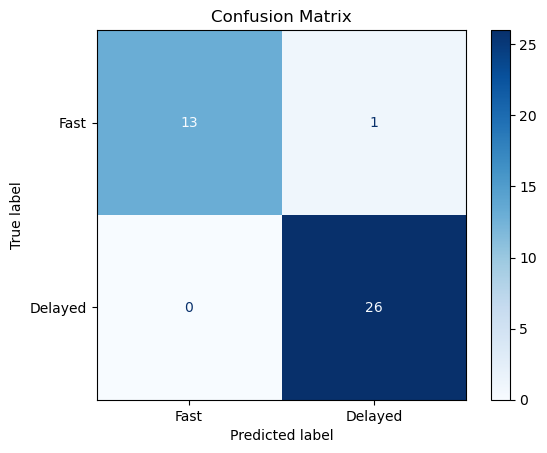

In [68]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fast', 'Delayed'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


# ROC Curve (for Classification Model)

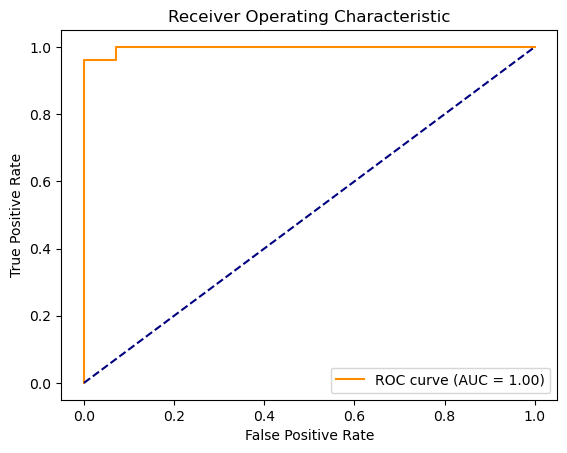

In [69]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities
y_probs = log_reg.predict_proba(X_test_transformed)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
